# Linear fit with constraints - elimination (2)
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f

### (1) Definition of model

Consider controlled parameter range is [-1,1]

In [8]:
# True functional dependece (with offset !)

def mytrue(x):
    
    val = 0.55 + 0.5*np.cos(x*np.pi + 0.5*np.cos(x*np.pi/2.))

    return val

# Basic functions:  1, x, x^2, x^3 ...

def myfun(x,ifun):

    return np.power(x,ifun)

# Full model

def mymodel(x,par):

    val = np.zeros(x.size)
    
    for ip in range(par.size):
        val+=par[ip]*myfun(x,ip)
        
    return val


### (2) Generate pseudo data to fit

In [3]:
# Considered values of x

xvec = np.linspace(-0.95,0.95,20)

# Measurement precision

svec = np.linspace(0.02,0.03,xvec.size)
s2vec = svec*svec

# Pseudo-data

yvec = np.random.normal(mytrue(xvec),svec)


### (3)  Linear fit without constraint

In [4]:
# Number of model functions to consider 

Nfun = 6

A = np.zeros((Nfun,Nfun))

B = np.zeros(Nfun)

for l in range(Nfun):
    fl = myfun(xvec,l)
    B[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nfun):
        fk = myfun(xvec,k)
        A[l,k] = np.sum(fl*fk/s2vec)


# Inverse of matrix

Cov = np.linalg.inv(A)

# Solution to the problem

par = Cov @ B

# Parameter uncertainties

epar = np.sqrt(np.diagonal(Cov))

print("\n Fit results:\n\n     par         sigma_p\n")

for ip in range(par.size):
    print("  %8.3f  +/- %6.3f " % (par[ip],epar[ip]))

# Calculate correlation matrix, including rounding

Corr = Cov

print("\n Correlation matrix\n")
for ip in range(par.size):
    for jp in range(par.size):
        Corr[ip,jp]=int(1000.*Corr[ip,jp]/epar[ip]/epar[jp]+0.5)/1000.
        
    print(Corr[ip,:])

# Fitted function

fvec = mymodel(xvec,par) 

# Chi^2 printout

chi2 = np.sum((yvec-fvec)**2/s2vec)

print("\n chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2,chi2/(xvec.size-Nfun)))

# print("\n  x       y         f(x) ")
# for ix in range(xvec.size):
#     print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],fvec[ix]))


 Fit results:

     par         sigma_p

     0.996  +/-  0.011 
    -0.745  +/-  0.043 
    -2.058  +/-  0.068 
     1.728  +/-  0.173 
     1.120  +/-  0.077 
    -1.027  +/-  0.155 

 Correlation matrix

[ 1.     0.102 -0.745 -0.12   0.603  0.124]
[ 0.102  1.    -0.074 -0.914  0.06   0.82 ]
[-0.745 -0.074  1.     0.161 -0.959 -0.194]
[-0.12  -0.914  0.161  1.    -0.152 -0.975]
[ 0.603  0.06  -0.959 -0.152  1.     0.203]
[ 0.124  0.82  -0.194 -0.975  0.203  1.   ]

 chi^2 =    10.717   chi^2/Ndf =  0.76552 


### (4)  Linear fit of reduced model

In [5]:
# Number of constraints

Ncon = 2

# Number of parameters in "reduced function" 

Nred = Nfun-Ncon

# reduced model
# Constrains included in the functions formula
# For given number of input parameters, additional terms added to
# take constraints into account (one for even and one for odd terms)

def myred(x,par):

    parsum = np.zeros(2)
    
    for ip in range(par.size):
        parsum[ip%2] -= par[ip]
        
    npar = np.zeros(par.size+2)

    npar[:par.size]=par
    npar[par.size] = parsum[par.size%2]
    npar[par.size+1] = parsum[(par.size+1)%2]
    
    val = np.zeros(x.size)
    
    for ip in range(npar.size):
        val+=npar[ip]*myfun(x,ip)
        
    return val


Ar = np.zeros((Nred,Nred))

Br = np.zeros(Nred)

# additional terms for even and odd powers

lc = np.empty(2, dtype=int)

if Nred%2 == 0 :
    lc[0] = Nred
    lc[1] = Nred+1
else:    
    lc[0] = Nred+1
    lc[1] = Nred

# Calculate arrays including constrain terms

for l in range(Nred):
    fl = myfun(xvec,l) - myfun(xvec,lc[l%2])
    Br[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nred):
        fk = myfun(xvec,k) - myfun(xvec,lc[k%2])
        Ar[l,k] = np.sum(fl*fk/s2vec)


# Inverse of matrix

RCov = np.linalg.inv(Ar)

# Solution to the problem

parr = RCov @ Br

# Parameter uncertainties

eparr = np.sqrt(np.diagonal(RCov))

print("\n Fit results:\n\n     par         sigma_p\n")

for ip in range(parr.size):
    print("  %8.3f  +/- %6.3f " % (parr[ip],eparr[ip]))

# Calculate correlation matrix, including rounding

RCorr = RCov

print("\n Correlation matrix\n")
for ip in range(parr.size):
    for jp in range(parr.size):
        RCorr[ip,jp]=int(1000.*RCorr[ip,jp]/eparr[ip]/eparr[jp]+0.5)/1000.
        
    print(RCorr[ip,:])

# Fitted function

frvec = myred(xvec,parr) 

# Chi^2 printout

chi2r = np.sum((yvec-frvec)**2/s2vec)

print("\n chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2r,chi2r/(xvec.size-Nred)))

# print("\n  x       y         f(x) ")
# for ix in range(xvec.size):
#     print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],fvec[ix]))


 Fit results:

     par         sigma_p

     0.988  +/-  0.010 
    -0.702  +/-  0.039 
    -1.957  +/-  0.054 
     1.497  +/-  0.134 

 Correlation matrix

[ 1.     0.109 -0.754 -0.125]
[ 0.109  1.    -0.08  -0.92 ]
[-0.754 -0.08   1.     0.165]
[-0.125 -0.92   0.165  1.   ]

 chi^2 =    23.216   chi^2/Ndf =  1.45103 


In [6]:

dchi = chi2r - chi2

F = (dchi/Ncon)/(chi2/(xvec.size-Nfun))

print("\n F statistics for constraint: %.3f " % (F))

p = f.sf(F,Ncon,xvec.size-Nfun)

print("\n Statistical fluctuation probability p = %.3g" % (p))



 F statistics for constraint: 8.164 

 Statistical fluctuation probability p = 0.00447


### (5) Draw data and fit

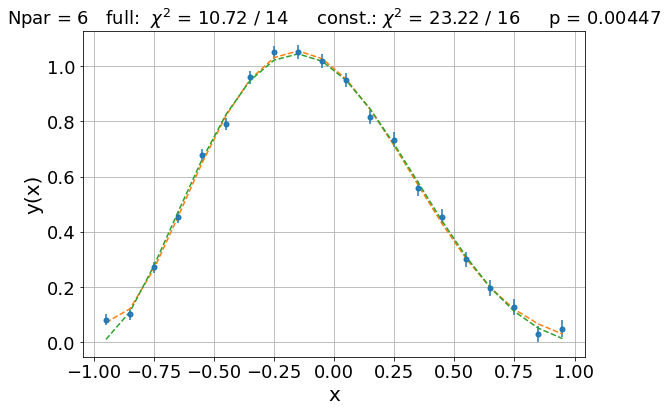

In [7]:
plt.figure(figsize=(9, 6))

plt.errorbar(xvec,yvec,svec, linestyle='none', marker='o', ms=2, mew=4)

plt.plot(xvec,fvec,'--')
plt.plot(xvec,frvec,'--')

plt.title('Npar = '+str(Nfun)+'   full:  $\chi^{2}$ = '+str(int(100*chi2+0.5)/100.)+' / '+str(xvec.size-Nfun)
                +'     const.: $\chi^{2}$ = '+str(int(100*chi2r+0.5)/100.)+' / '+str(xvec.size-Nred)
                +'     p = '+str(round(p,5)),size=18)
    
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

fname = '09_reduce2_'+str(Nfun)+'.png'
plt.savefig(fname)